$$\Large\textbf{RandomTree for Solar Features}$$

In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

%matplotlib inline

/home/bara/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#loading table with solar feature properties with solar features manually classificated
table = pd.read_csv('tables/test_classification.csv')

#data need to be separated again, as in SVD, to remove unlabelled data
sunspot_table = table.loc[table['sunspot'] == 1]
filament_table = table.loc[table['filament'] == 1]
plage_table = table.loc[table['plage'] == 1]
flare_table = table.loc[table['flare'] == 1]
#now we'll have table with all features manually labelled, table is sorted according classes!
#(only one 1 and three 0 in one row for these columns: sunspot, filament, plage, flare)
frames = [sunspot_table, filament_table, plage_table, flare_table]
regions_detected_table = pd.concat(frames, ignore_index=False)

In [3]:
regions_detected_table.head()

,label,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,mean_intensity,min_intensity,max_intensity,...,relative_intensity,relative_min_intensity,relative_max_intensity,complexity,bbox_ratio,elongatedness,sunspot,filament,plage,flare
45,46,815,1129,805,1119,828,1141,7794.225248,4766,9190,...,0.851270,0.520533,1.003713,0.012376,0.956522,0.712871,1,0,0,0
46,47,841,881,830,870,855,895,7178.214000,3936,9138,...,0.783990,0.429882,0.998034,0.018000,1.000000,0.784000,1,0,0,0
51,52,845,1234,838,1225,855,1245,8322.142202,7278,9683,...,0.908928,0.794889,1.057558,0.077982,0.850000,0.449541,1,0,0,0
65,66,965,1215,956,1208,976,1225,7609.211538,4934,9140,...,0.831063,0.538882,0.998253,0.015385,0.850000,0.769231,1,0,0,0
80,81,1192,1208,1180,1195,1206,1222,7119.341463,4161,8929,...,0.777560,0.454456,0.975208,0.015009,0.962963,0.735460,1,0,0,0


In [4]:
#Create table only with properties for classification and manually classificated objects
train_table = regions_detected_table[['centroid-0', 'centroid-1', 'eccentricity', 'circularity', 
                           'elongation', 'bbox_ratio', 'elongatedness', 'solidity', 'complexity', 
                           'relative_intensity', 'relative_min_intensity', 'relative_max_intensity',
                           'sunspot', 'filament', 'plage', 'flare']].copy()

In [5]:
train_table.head()

,centroid-0,centroid-1,eccentricity,circularity,elongation,bbox_ratio,elongatedness,solidity,complexity,relative_intensity,relative_min_intensity,relative_max_intensity,sunspot,filament,plage,flare
45,815,1129,0.367855,0.880313,0.070117,0.956522,0.712871,0.957346,0.012376,0.851270,0.520533,1.003713,1,0,0,0
46,841,881,0.659011,0.922547,0.247867,1.000000,0.784000,0.978474,0.018000,0.783990,0.429882,0.998034,1,0,0,0
51,845,1234,0.827849,0.783980,0.439049,0.850000,0.449541,0.935622,0.077982,0.908928,0.794889,1.057558,1,0,0,0
65,965,1215,0.575060,0.961790,0.181889,0.850000,0.769231,0.977444,0.015385,0.831063,0.538882,0.998253,1,0,0,0
80,1192,1208,0.627887,0.926776,0.221696,0.962963,0.735460,0.977982,0.015009,0.777560,0.454456,0.975208,1,0,0,0


In [6]:
#Split table into set O of properties a set V of labelled classes
data = np.array(train_table)
O = data[:, 2:12].astype(float)
print(O)
V = data[:, 12:16].astype(float)
print(V)

[[0.36785474 0.88031311 0.07011673 ... 0.85126969 0.52053298 1.00371341]
 [0.65901113 0.92254738 0.24786682 ... 0.78399017 0.42988204 0.99803408]
 [0.82784932 0.78397965 0.43904946 ... 0.90892772 0.7948886  1.05755789]
 ...
 [0.66820573 0.42196065 0.25602345 ... 1.35735088 1.12751239 1.79311957]
 [0.75291737 0.19187416 0.34188494 ... 1.27477856 1.09058615 1.86201739]
 [0.92731217 0.34151251 0.62571116 ... 1.42962078 1.14723754 1.93484154]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [7]:
#spliting data set into test_data for learning and data for test classification
O_train, O_test, V_train, V_test = train_test_split(O, V, test_size=0.5, train_size=0.5) 

In [8]:
#Random Forest applied, create forest and fit training data
clf = RandomForestClassifier(n_estimators=200, class_weight=None)
clf.fit(O_train, V_train)
#Testing created forest on the test data
V_pred = clf.predict(O_test)

In [9]:
#let's see predicted labels
V_pred

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [10]:
#Let's compare predicted labels with these test labels, it sees work well for all classes
V_test

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [11]:
#Are test labels and predicted labels similar enough?
accuracy_score(V_test, V_pred)

0.9863694676074407

In [12]:
#Let's classification report - prediction was quite successful for sunspots, filament, plages
#not so successful for flares - but these were rarely contained in data set (only 47 among 12471 objects)
print(classification_report(V_pred, V_test))

             precision    recall  f1-score   support

          0       0.84      0.94      0.89       270
          1       0.99      0.97      0.98      1685
          2       1.00      1.00      1.00      4266
          3       0.39      0.69      0.50        16

avg / total       0.99      0.99      0.99      6237



In [13]:
#Let's try prabability classification, which predicted cases were unsure?
V_prob =  clf.predict_proba(O_test)

In [14]:
#Probability prediction returns 8 columns, two for one class - first one is probability that object is not
#contained in given class (label = 0), second one is probability of label = 1
V_prob[0][:,1], V_test[:, 0]

(array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [15]:
len(V_test[:,0])

6236

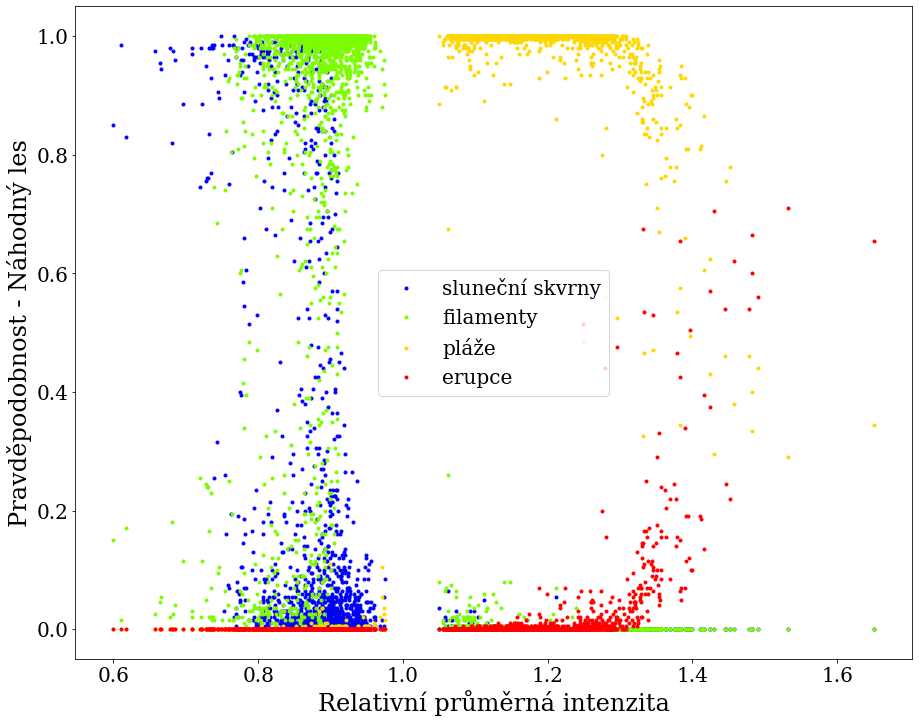

In [16]:
#Plot predicted probalities of each class and corresponding intensity.
#Intensity normalised to the range <0,1>.
#Intensity plot is used because in case of manually labelled data, it shows 4 different classes quite well.
#We see what we can expect - with 50% detection sunspot and filament overlap, but not with plages and flares
#and around 50% probability plages and flares overlap, but not with dark features (sunspots and filaments).
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['font.size']=20
plt.rcParams["font.weight"] = "normal"
plt.rcParams['font.family'] = ['Serif']

plt.plot(O_test[:,7], V_prob[0][:,1], 'bo', markersize=3, label='sluneční skvrny')
plt.plot(O_test[:,7], V_prob[1][:,1], 'o', color='lawngreen', markersize=3, label='filamenty')
plt.plot(O_test[:,7], V_prob[2][:,1], 'o', color='gold', markersize=3, label='pláže')
plt.plot(O_test[:,7], V_prob[3][:,1], 'ro', markersize=3, label='erupce')
plt.xlabel('Relativní průměrná intenzita', fontsize=24)
plt.ylabel('Pravděpodobnost - Náhodný les', fontsize=24)
plt.legend(fontsize=20)

$$\Large\textbf{Graphs for RandomTree for Solar Features}$$

In [17]:
#Let's see results for all objects, we use different plot which shows number of object and its probability
V_prob_all =  clf.predict_proba(O)

In [18]:
#We want array of probabilities where each column corresponds to given class,
#so first create columns for each class
first_spot = V_prob_all[0][:,1]
second_fil = V_prob_all[1][:,1]
third_plag = V_prob_all[2][:,1]
fourth_flar = V_prob_all[3][:,1]

In [19]:
#and then stack these columns into array
probability_prediction = np.column_stack((first_spot,second_fil, third_plag, fourth_flar))

In [20]:
#Just verification that the shape of predicted probabilities is same as shape of detected regions table
probability_prediction.shape

(12471, 4)

In [21]:
#create table from array of predicted probabilities
predicted = pd.DataFrame(probability_prediction, columns=['sunspot_pred', 
                                                          'filament_pred', 'plage_pred', 'flare_pred'])
#reset index of rows in table of regions detected and sorted, so it can be connected to data
regions_detected_table.reset_index(drop=True, inplace=True)
regions_detected_table.head()
#connect predicted probabilities with table of detected and sorted regions
result = pd.concat([regions_detected_table, predicted], axis=1, ignore_index=False)

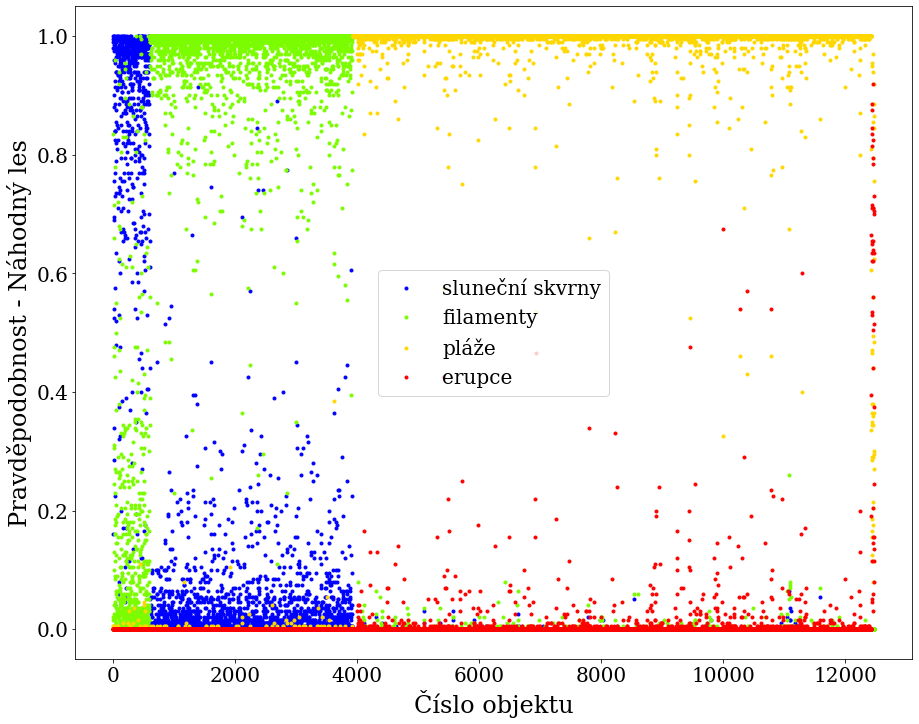

In [22]:
#plot estimated probabilities for each object, object are sorted like that:
#firs part are object labelled as sunspots, then object labelled asi filaments, then plages and then flares
#Amount of manually labelled data in each class: 598 sunspots, 3329 filaments, 8497 plages, 47 flares
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['font.size']=20
plt.rcParams["font.weight"] = "normal"
plt.rcParams['font.family'] = ['Serif']

plt.plot(result['sunspot_pred'].index, result['sunspot_pred'].values, 'bo', markersize=3, label='sluneční skvrny')
plt.plot(result['filament_pred'].index, result['filament_pred'].values, 'o', color='lawngreen', 
                                          markersize=3, label='filamenty')
plt.plot(result['plage_pred'].index, result['plage_pred'].values, 'o', color='gold', markersize=3, label='pláže')
plt.plot(result['flare_pred'].index, result['flare_pred'].values, 'ro', markersize=3, label='erupce')
plt.xlabel('Číslo objektu', fontsize=24)
plt.ylabel('Pravděpodobnost - Náhodný les', fontsize=24)
plt.legend(fontsize=20)

In [24]:
#Just to show table where classes are labelled manually a then there are classes predisted by 
#Random Forest classifier
result

,label,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,mean_intensity,min_intensity,max_intensity,...,bbox_ratio,elongatedness,sunspot,filament,plage,flare,sunspot_pred,filament_pred,plage_pred,flare_pred
0,46,815,1129,805,1119,828,1141,7794.225248,4766,9190,...,0.956522,0.712871,1,0,0,0,0.995,0.005,0.000,0.0
1,47,841,881,830,870,855,895,7178.214000,3936,9138,...,1.000000,0.784000,1,0,0,0,0.990,0.015,0.000,0.0
2,52,845,1234,838,1225,855,1245,8322.142202,7278,9683,...,0.850000,0.449541,1,0,0,0,0.160,0.835,0.005,0.0
3,66,965,1215,956,1208,976,1225,7609.211538,4934,9140,...,0.850000,0.769231,1,0,0,0,1.000,0.000,0.000,0.0
4,81,1192,1208,1180,1195,1206,1222,7119.341463,4161,8929,...,0.962963,0.735460,1,0,0,0,0.980,0.020,0.000,0.0
